In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from calculator import Methods,Calculator
from scipy import optimize

In [2]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
cal.me.con.a=0.3
order=12
L_s=cal.L_init[order]
ST=cal.ST[order]
cal.me.con.set_M_p(cal.M_p[order],8e+3)

In [3]:
cal.me.cal_ML_simple(ST,L_s)
p,t=cal.me.P,cal.me.T
rcb1=cal.me.RCB_index
cal.me.cal_ML_simple_B(ST,L_s,True,0.0,1e-11*(-1))
rcb2=cal.me.RCB_index
c_P,c_T,c_M=cal.me.con.c_P,cal.me.con.c_T,cal.me.con.c_M
r,P,T,M,L,G,dG=cal.me.r,cal.me.P,cal.me.T,cal.me.M,cal.me.L,cal.me.g,cal.me.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**(2)*T[i]**(-3)/M[i],cal.me.con.g_ad)*(T[i]*dP[i]/P[i])
dM=c_M*r**2*P/T
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)*dG-(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B

In [4]:
cal.me.M[-1]

5.464961359351352

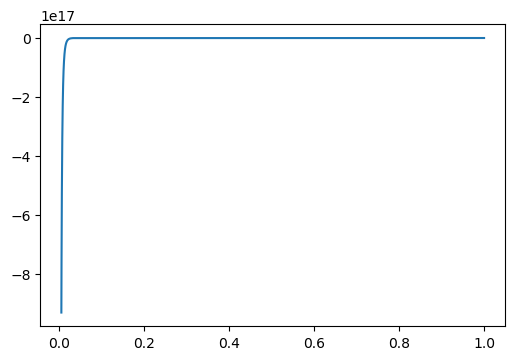

In [5]:
g=cal.me.g
fig=plt.figure(dpi=100)
plt.plot(r,g/r/cal.me.con.R_B)
#plt.loglog(r,ddG,'r--')
plt.show()

[]

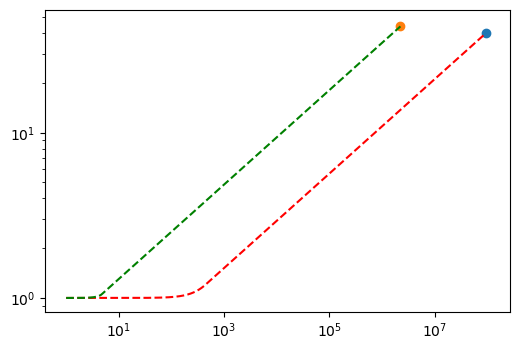

In [6]:
fig=plt.figure(dpi=100)
plt.loglog(p,t,'r--')
plt.scatter(p[rcb1],t[rcb1])
plt.loglog(P,T,'g--')
plt.scatter(P[rcb2],T[rcb2])
plt.plot()

In [7]:
print(rcb1,rcb2)

4999 4999


In [6]:
test_M_v=(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B
test_sigma=((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)

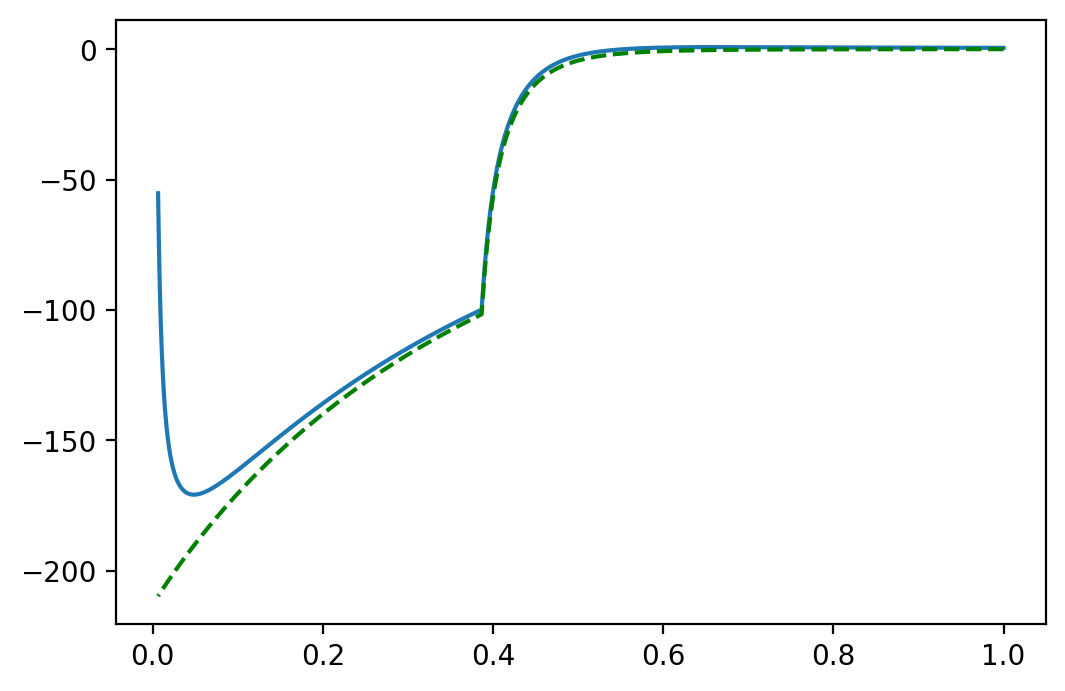

In [7]:
fig=plt.figure(dpi=200)
plt.plot(r,test_sigma)
plt.plot(r,(cal.me.con.sigma_2/T**2)*dT,'g--')
plt.show()

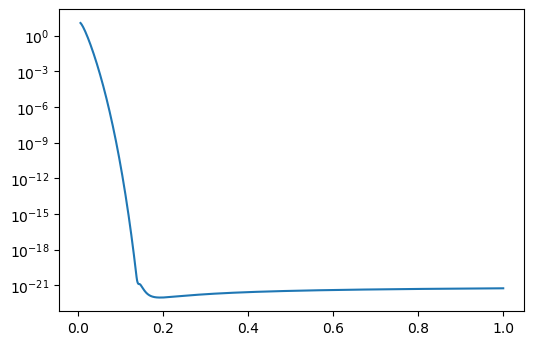

In [40]:
fig=plt.figure(dpi=100)
#plt.plot(r,test_sigma)
plt.semilogy(r,cal.me.sigma(P,T)/9e9)
plt.show()

array([-8.28366827e+04, -8.20582815e+04, -8.12746501e+04, -8.04857523e+04,
       -7.96915517e+04, -7.88920116e+04, -7.80870952e+04, -7.72767651e+04,
       -7.64609838e+04, -7.56397134e+04, -7.48129158e+04, -7.39805526e+04,
       -7.31425849e+04, -7.22989737e+04, -7.14496797e+04, -7.05946631e+04,
       -6.97338840e+04, -6.88673020e+04, -6.79948764e+04, -6.71165664e+04,
       -6.62323305e+04, -6.53421272e+04, -6.44459144e+04, -6.35436500e+04,
       -6.26352912e+04, -6.17207951e+04, -6.08001182e+04, -5.98732170e+04,
       -5.89400474e+04, -5.80005650e+04, -5.70547250e+04, -5.61024823e+04,
       -5.51437914e+04, -5.41786065e+04, -5.32068814e+04, -5.22285694e+04,
       -5.12436236e+04, -5.02519965e+04, -4.92536404e+04, -4.82485072e+04,
       -4.72365484e+04, -4.62177149e+04, -4.51919574e+04, -4.41592263e+04,
       -4.31194712e+04, -4.20726417e+04, -4.10186867e+04, -3.99575549e+04,
       -3.88891943e+04, -3.78135528e+04, -3.67305776e+04, -3.56402155e+04,
       -3.45424130e+04, -

In [10]:
dG

array([-1.00000000e-11,  1.02494721e+00,  2.03956113e+00,  3.04378921e+00,
        4.03757851e+00,  5.02087567e+00,  5.99362689e+00,  6.95577796e+00,
        7.90727424e+00,  8.84806067e+00,  9.77808173e+00,  1.06972815e+01,
        1.16056035e+01,  1.25029910e+01,  1.33893867e+01,  1.42647327e+01,
        1.51289710e+01,  1.59820428e+01,  1.68238891e+01,  1.76544501e+01,
        1.84736657e+01,  1.92814756e+01,  2.00778185e+01,  2.08626329e+01,
        2.16358568e+01,  2.23974277e+01,  2.31472825e+01,  2.38853577e+01,
        2.46115892e+01,  2.53259124e+01,  2.60282622e+01,  2.67185731e+01,
        2.73967788e+01,  2.80628127e+01,  2.87166076e+01,  2.93580956e+01,
        2.99872084e+01,  3.06038772e+01,  3.12080325e+01,  3.17996043e+01,
        3.23785221e+01,  3.29447146e+01,  3.34981101e+01,  3.40386364e+01,
        3.45662204e+01,  3.50807887e+01,  3.55822672e+01,  3.60705811e+01,
        3.65456552e+01,  3.70074133e+01,  3.74557791e+01,  3.78906751e+01,
        3.83120236e+01,  